<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [58]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [59]:
from bs4 import BeautifulSoup
import requests
##### Your Code Here #####

df = pd.read_csv('./data/job_listings.csv')
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


In [60]:
print(df.shape)
df.tail()

(426, 3)


,Unnamed: 0,description,title
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist
425,425,b'<div></div><div><div><div><div><p>Cerner Int...,Data Scientist


In [61]:
df = df.iloc[:,1:]

In [62]:
import re

In [63]:
df['description'] = df['description'].apply(lambda comment: re.sub(r'<.*?>', '', comment))

In [64]:
df

,description,title
0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist
...,...,...
421,"b""About Us:\nWant to be part of a fantastic an...",Senior Data Science Engineer
422,"b'InternshipAt Uber, we ignite opportunity by ...",2019 PhD Data Scientist Internship - Forecasti...
423,"b'$200,000 - $350,000 a yearA million people a...",Data Scientist - Insurance
424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",Senior Data Scientist


## 2) Use Spacy to tokenize the listings 

In [65]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [66]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [67]:
len(df['description'])

426

In [68]:
def make_corpus(pdser):
    data =[]
    for i in range(len(pdser)):
        data.append(pdser[i])
    return data

In [75]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [76]:
data = make_corpus(df['description'])

In [86]:
data[0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

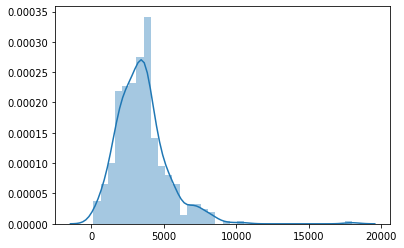

In [78]:
doc_len = [len(doc) for doc in data]

import seaborn as sns
# y axis is density plot
sns.distplot(doc_len);

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# instantiate the countvectorizer class
vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4) Visualize the most common word counts

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [89]:
tfidf = TfidfVectorizer(ngram_range=(1,2),
                        max_df=.97,
#                         min_df=1,
                        tokenizer=tokenize)

# tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) 

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,"""\ncommvault","""\ncommvault offer",$,"$ 1,000",$ 1.66,$ 10,"$ 100,000","$ 100,908",$ 10b,$ 110k,...,|| santa,|| serveng,|| united,|| ||,~$70,~$70 million,~1,~1 year)\nyou,~4,~4 week
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.101882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
dtm.head(200)

,"""\ncommvault","""\ncommvault offer",$,"$ 1,000",$ 1.66,$ 10,"$ 100,000","$ 100,908",$ 10b,$ 110k,...,|| santa,|| serveng,|| united,|| ||,~$70,~$70 million,~1,~1 year)\nyou,~4,~4 week
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.101882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
196,0.0,0.0,0.019773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
197,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050721,0.050721,0.0,0.0,0.0,0.0
198,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [91]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [92]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.37797513, 1.37992561, 1.38018292, 1.38427479]]),
 array([[  0, 115, 276, 274, 327]]))

In [93]:
rndm_job_description = [ """
a data scientist with masters degree and work 
experience with natural language processing is preferred
"""]

In [94]:
# Query for Sim of Random doc to BBC
new_dtm = tfidf.transform(rndm_job_description)

In [95]:
nn.kneighbors(new_dtm.todense())

(array([[1.34390166, 1.34788053, 1.34923621, 1.35425957, 1.35928301]]),
 array([[201, 361, 356, 254, 239]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 